## Problem Solving Homework 6
This homework is intended for you to continue to develop your skills in both Pandas and linear modeling. You'll also use Seaborn to visualize the results. Again, you have to do some independent thinking to integrate various concepts you've learned in the class.

As usual, you must describe all code to get credit.

Part of this homework is taken from HW5 since we did not get to the parts of that homework. So, for those you'll be using the same NHANES data as in HW4 & HW5. This data contains the result of interviews and other data collection on thousands of US adults in the 70s and 80s.



### 1. NHANES Cleaning
Read in the NHANES NHEFS data into a data frame and clean it to make it more useful for analysis with the following steps. Make a cleaned version of the data frame, codeing each column into either a binary or a number value.  For columns coded into a binary value, you must code them so that 
More extreme values get put together. Like if possible values are "Love ice cream" "Like ice cream", "Don't care about ice cream", "Dislike ice cream", "Hate ice cream" then the more positive feelings about ice cream must be put together into the same category. As well, no category should have fewer than 250 people in it. (You can reuse your HW4 or HW5 code if you did one of these, but make sure you follow the requirements).

Remove WT82 as a feature (you can use the pandas [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function

In [1]:
# Load packages and data
import pandas as pd
import numpy as np
nhefs = pd.read_csv('../data/nhefs.csv')

# Drop wt82
nhefs = nhefs.drop('wt82', axis=1)
# For columns with categories, pull the category
cats = nhefs.loc[:,['alcoholfreq', 'exercise', 'quit']]
cats = cats.applymap(lambda x: int(x[0]))
# Replace the categorical columns in the main df with our encoded columns
nhefs = nhefs.drop(['alcoholfreq', 'exercise', 'quit'], axis=1)
nhefs = pd.concat([cats, nhefs], axis=1)

# nerve_med (nerve medication or not)
nhefs['nerve_med'] = (nhefs['nerve_med'] == 'Yes').astype(int)

# sex (male or not)
nhefs['sex'] = (nhefs['sex'] == 'man').astype(int)

# marital (married or not)
nhefs['marital'] = (nhefs['marital'] == 'married').astype(int)

# race (white or not)
nhefs['race'] = (nhefs['race'] == 'White').astype(int)

nhefs

c:\Users\sjcde\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\sjcde\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\sjcde\anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,alcoholfreq,exercise,quit,income,price71,price82,smokeintensity,smokeyrs,tax71_82,wt71,wt82_71,school,nerve_med,sex,marital,race
0,1,2,0,19.0,2.183594,1.739990,30,29,0.640381,79.04,-10.093960,7,0,1,1,0
1,0,0,0,18.0,2.346680,1.797363,20,24,0.792969,58.63,2.604970,9,0,1,1,1
2,3,2,0,15.0,1.569580,1.513428,20,26,0.320251,56.81,9.414486,11,1,0,0,0
3,2,2,0,15.0,1.506592,1.451904,3,53,0.304993,59.42,4.990117,5,0,1,0,0
4,2,1,0,18.0,2.346680,1.797363,20,19,0.792969,87.09,4.989251,11,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,3,0,0,18.0,2.167969,1.940186,20,31,0.500000,57.72,3.514970,8,0,0,1,1
1742,4,0,0,15.0,1.800781,1.647705,40,30,0.272949,62.71,NaN,12,0,0,1,1
1743,2,1,0,13.0,2.167969,1.940186,15,46,0.500000,52.39,4.762639,6,0,1,1,1
1744,2,0,0,15.0,2.167969,1.940186,20,9,0.500000,86.75,0.793327,11,0,1,1,1


## 2. Pair of predictors (question 3 from hw 5)
Get the best pair of two predictors of weight gain.  Your answer should print the best model summary as well as show how you decided this was the best pair. (We will discuss more than one predictor Nov 15 or 16)

In [2]:
# Use the log-likelihood to figure out which model is the *most* likely
# Drop NaNs
nhefs = nhefs.dropna()
import statsmodels.api as sm
# Drop the weight gain var so that we only look at predictors
wt82_71pred = nhefs.drop(['wt82_71'],axis=1)
# Set the current maximum at negative infinite likelihood (so that actual models will be higher)
current_max = -np.inf
# For each pair of predictors in the dataset
for col in wt82_71pred.columns:
    for other_col in wt82_71pred.drop([col],axis=1):
        # Create an X (predictors) df with pred1 and pred2
        X = nhefs.loc[:, [col, other_col]]
        # Add a constant
        X = sm.add_constant(X)
        # Make weight gain the y-value
        y = nhefs['wt82_71']
        # Fit a model of weight gain vs. these predictors
        model = sm.OLS(y, X).fit()
        # If the likelihood is closer to 0
        if model.llf > current_max:
            # Make it the current min
            current_max = model.llf
            # Make these the best preds
            best_preds = [col, other_col]

 # Create an X (predictors) df with the best predictors
X = nhefs.loc[:, best_preds]
# Add a constant
X = sm.add_constant(X)
# Make weight gain the y-value
y = nhefs['wt82_71']
two_model = sm.OLS(y, X).fit()
two_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wt82_71   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     42.89
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           7.54e-19
Time:                        14:51:09   Log-Likelihood:                -5261.0
No. Observations:                1527   AIC:                         1.053e+04
Df Residuals:                    1524   BIC:                         1.054e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8635      0.981     11.070      0.000       8.939      12.788
smokeyrs      -0.1099      0.016     -6.705      0.000      -0.142      -0.078
wt71          -0.0764      0.013     -6.043      0.000      -0.101      -0.052
==============================================================================
Omnibus:                      183.332   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.801
Skew:                           0.423   Prob(JB):                    1.73e-213
Kurtosis:                       6.832   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. Model metrics (question 4 from hw 5) 
Calculate RMSE, R-squared, and likelihood of your best models without using the model functions (just using regular pandas/scipy.stats functions)

#### 3A: RMSE

In [3]:
# Get the model's predictions based on best_preds
X = nhefs.loc[:, best_preds] 
predictions = two_model.params['const'] + two_model.params[best_preds[0]] * nhefs[best_preds[0]] + two_model.params[best_preds[1]] * nhefs[best_preds[1]]

# Calculate RMSE
RMSE = ((predictions - nhefs['wt82_71'])**2 / len(predictions)).sum()

print(RMSE)

57.55679655250161


#### 3C: Likelihood

In [4]:
# Assuming a normal distribution for this numerical data
from scipy.stats import norm
probability = norm.pdf(nhefs['wt82_71'], loc=predictions, scale=nhefs['wt82_71'].std())
likelihood = np.log(probability).sum()

print(likelihood)

-5262.161771836903


## 4. Predict
### 4A: Make predictions
Predict weight gain using the best models you created in 2. Do not use the "predict" function of the model.  Your answer should create a Series for each of the two models. Print out the head of the Series and the describe of the series, for each series, with the models clearly labeled.


In [6]:
# Get the model's predictions based on best_preds
X = nhefs.loc[:, best_preds] 
predictions = two_model.params['const'] + two_model.params[best_preds[0]] * nhefs[best_preds[0]] + two_model.params[best_preds[1]] * nhefs[best_preds[1]]
predictions

0       1.640546
1       3.748671
2       3.667878
3       0.501490
4       2.124699
          ...   
1740    2.861668
1741    3.048926
1743    1.807595
1744    3.249578
1745    2.388540
Length: 1527, dtype: float64

### 4B: Visualize predictions
Using seaborn, make a plot that has one predictor on the x-axis, and the wt82_71 on the y-axis, and the predicted values of wt82_71 also on the y-axis, in another color clearly indicated.  

Make this plots for each predictor, and also make a 3rd plot that combines the 2 predictors.

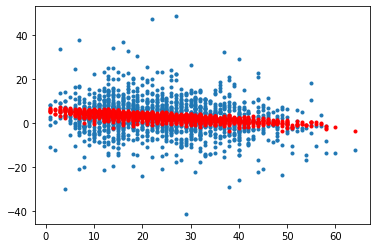

In [7]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1)
ax.plot(nhefs[best_preds[0]], nhefs['wt82_71'], '.')
ax.plot(nhefs[best_preds[0]], predictions, '.', color='red')
plt.show()